In [21]:
import pandas as pd


df = pd.read_csv("../rawData/dryBearing/raw_11173_520_161202_141603.csv", sep=';')

# df.head()
df = df.iloc[:, :-3]

df.head()

df.info()
df.describe()

# list of file path for each dataset
## create a for loop to iterate over each file path 
### load the dataset
#### and to data exploration => printing using df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18771 entries, 0 to 18770
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   -0.0000    18771 non-null  float64
 1   0.0000     18771 non-null  float64
 2   -0.0000.1  18771 non-null  float64
 3   -0.0000.2  18771 non-null  float64
 4   0.0000.1   18771 non-null  float64
 5   -0.0000.3  18771 non-null  float64
 6   -43.8520   18771 non-null  float64
 7   -28.7582   18771 non-null  float64
 8   -55.5674   18771 non-null  float64
 9   -42.6073   18771 non-null  float64
 10  65.3795    18771 non-null  float64
 11  19.5901    18771 non-null  float64
dtypes: float64(12)
memory usage: 1.7 MB


,-0.0000,0.0000,-0.0000.1,-0.0000.2,0.0000.1,-0.0000.3,-43.8520,-28.7582,-55.5674,-42.6073,65.3795,19.5901
count,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000,18771.000000
mean,0.059594,2.808762,2.066812,0.151667,0.162310,0.011015,-11.204924,-18.269721,-56.979525,-43.732224,38.566085,17.153799
std,2.753614,4.879467,3.797520,1.301885,0.887002,0.626436,21.881238,9.939563,23.072373,3.951068,40.094728,7.517096
min,-12.617500,-15.165300,-16.955000,-3.567000,-2.501100,-2.142100,-43.853000,-29.446700,-102.026400,-56.677600,-31.703300,11.412000
25%,-0.185300,0.079250,0.582200,-0.061350,0.068850,-0.061100,-39.263200,-26.223300,-66.097850,-43.977800,-3.261550,11.412500
50%,-0.051700,3.611400,0.584400,0.062300,0.228400,0.015800,6.661000,-26.040800,-56.210500,-43.977700,62.607000,14.707800
75%,0.260400,5.734800,4.343050,0.890600,0.306400,0.113950,6.661000,-11.937100,-34.661300,-41.410300,69.100800,19.590200
max,12.748300,25.983300,17.808100,4.352200,2.555700,1.792200,6.957500,3.860200,-34.661000,-37.059400,69.101100,41.616800


In [22]:
from standard_scaler import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [23]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)


In [24]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1)
anomalies = model.fit_predict(scaled_data)

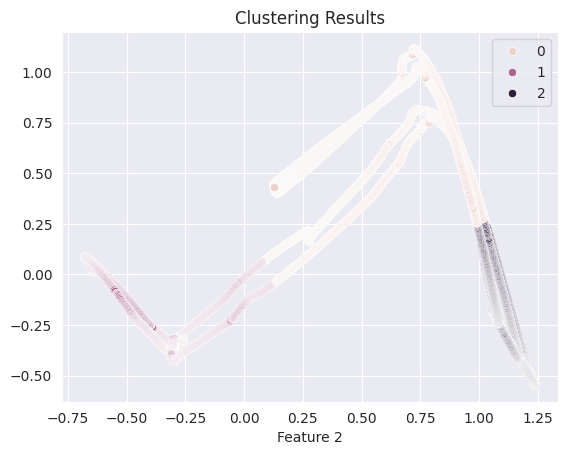

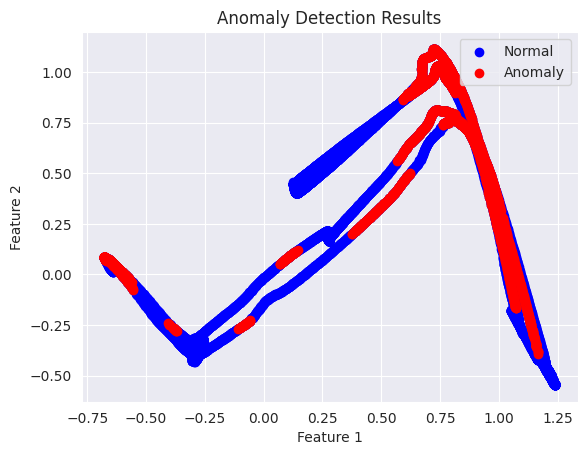

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Visualize clustered data
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters)
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.xlabel('Feature 2')
plt.show()

# Visualize anomalies
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='blue', label='Normal')
plt.scatter(pca_components[anomalies == -1, 0], pca_components[anomalies == -1, 1], c='red', label='Anomaly')
plt.title('Anomaly Detection Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [20]:
import config
import pandas as pd

df = pd.read_csv(config.TRAIN_DATA_DIR_TEST, sep=';')


df.head()

# df.info()
# df.describe()

,"-0.0000,0.0000,-0.0000.1,-0.0000.2,0.0000.1,-0.0000.3,-43.8520,-28.7582,-55.5674,-42.6073,65.3795,19.5901"
0,"-0.0,4.4639,3.4676,0.4609,0.2183,0.0,-43.852,-..."
1,"-0.0,4.464,3.4666,0.4609,0.2183,0.0,-43.852,-2..."
2,"-0.0,4.464,3.4667,0.4609,0.2183,0.0,-43.852,-2..."
3,"0.0,4.4639,3.4692,0.4609,0.2183,0.0001,-43.852..."
4,"0.0,4.4641,3.4634,0.4609,0.2182,0.0001,-43.852..."


In [24]:
from standard_scaler import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)


model = IsolationForest(contamination=0.1)
anomalies = model.fit_predict(scaled_data)

TypeError: unsupported operand type(s) for -: 'str' and 'str'